In [1]:
from DataBoardGame.gamelearning import GameFarm
from DataBoardGame.utils import set_log
import pandas as pd
import logging
set_log(logging.ERROR)


In [13]:
gf = GameFarm(number_of_players_per_game=4, parallel=2)    
for i in range(200):
    gf.learn()

In [15]:
res = []

for state, actions in gf.merge_q_tables().items():
    for action, value in actions.items():
        if value!=0:
            row = state.to_dict()
            row.update(action.to_dict())
            row['target'] = value
            res.append(row)
        
df = pd.json_normalize(res)
df

,state_value,action_type,target,card_flags.7118443623807982907_open,card_flags.7118443623807982907_trash,card_flags.-1215162803371835517_open,card_flags.-1215162803371835517_trash,card_flags.-6158084010650084885_open,card_flags.-6158084010650084885_trash,card_flags.6418469356891395815_open,...,employees.6418469356891395815_3,employees.-9209256788010207570_2,employees.6621078243026924551_1,employees.2077116892911261400_3,employees.-337074995307554715_3,employees.4838473271286179829_2,employees.4605649885283303336_3,employees.-2415592689870209839_3,employees.4838473271286179829_3,employees.-337074995307554715_2
0,1150.0,GenerateRsourceAction,-4.351155,True,False,True,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1150.0,GenerateRsourceAction,-4.351155,True,False,True,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1155.0,HireEmployeeAction,0.870231,True,False,True,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1155.0,HireEmployeeAction,0.870231,True,False,True,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1156.0,EmptyAction,97.769883,True,False,True,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298568,6906.0,GenerateRsourceAction,8.410260,True,True,False,True,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298569,6916.0,HireEmployeeAction,0.841026,True,True,False,True,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298570,6917.0,FireEmployeeAction,83.261578,True,True,False,True,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298571,7016.0,GenerateRsourceAction,8.410260,False,True,False,True,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from matplotlib import pyplot as plt
from sklearn import datasets,tree
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier
from sklearn import preprocessing




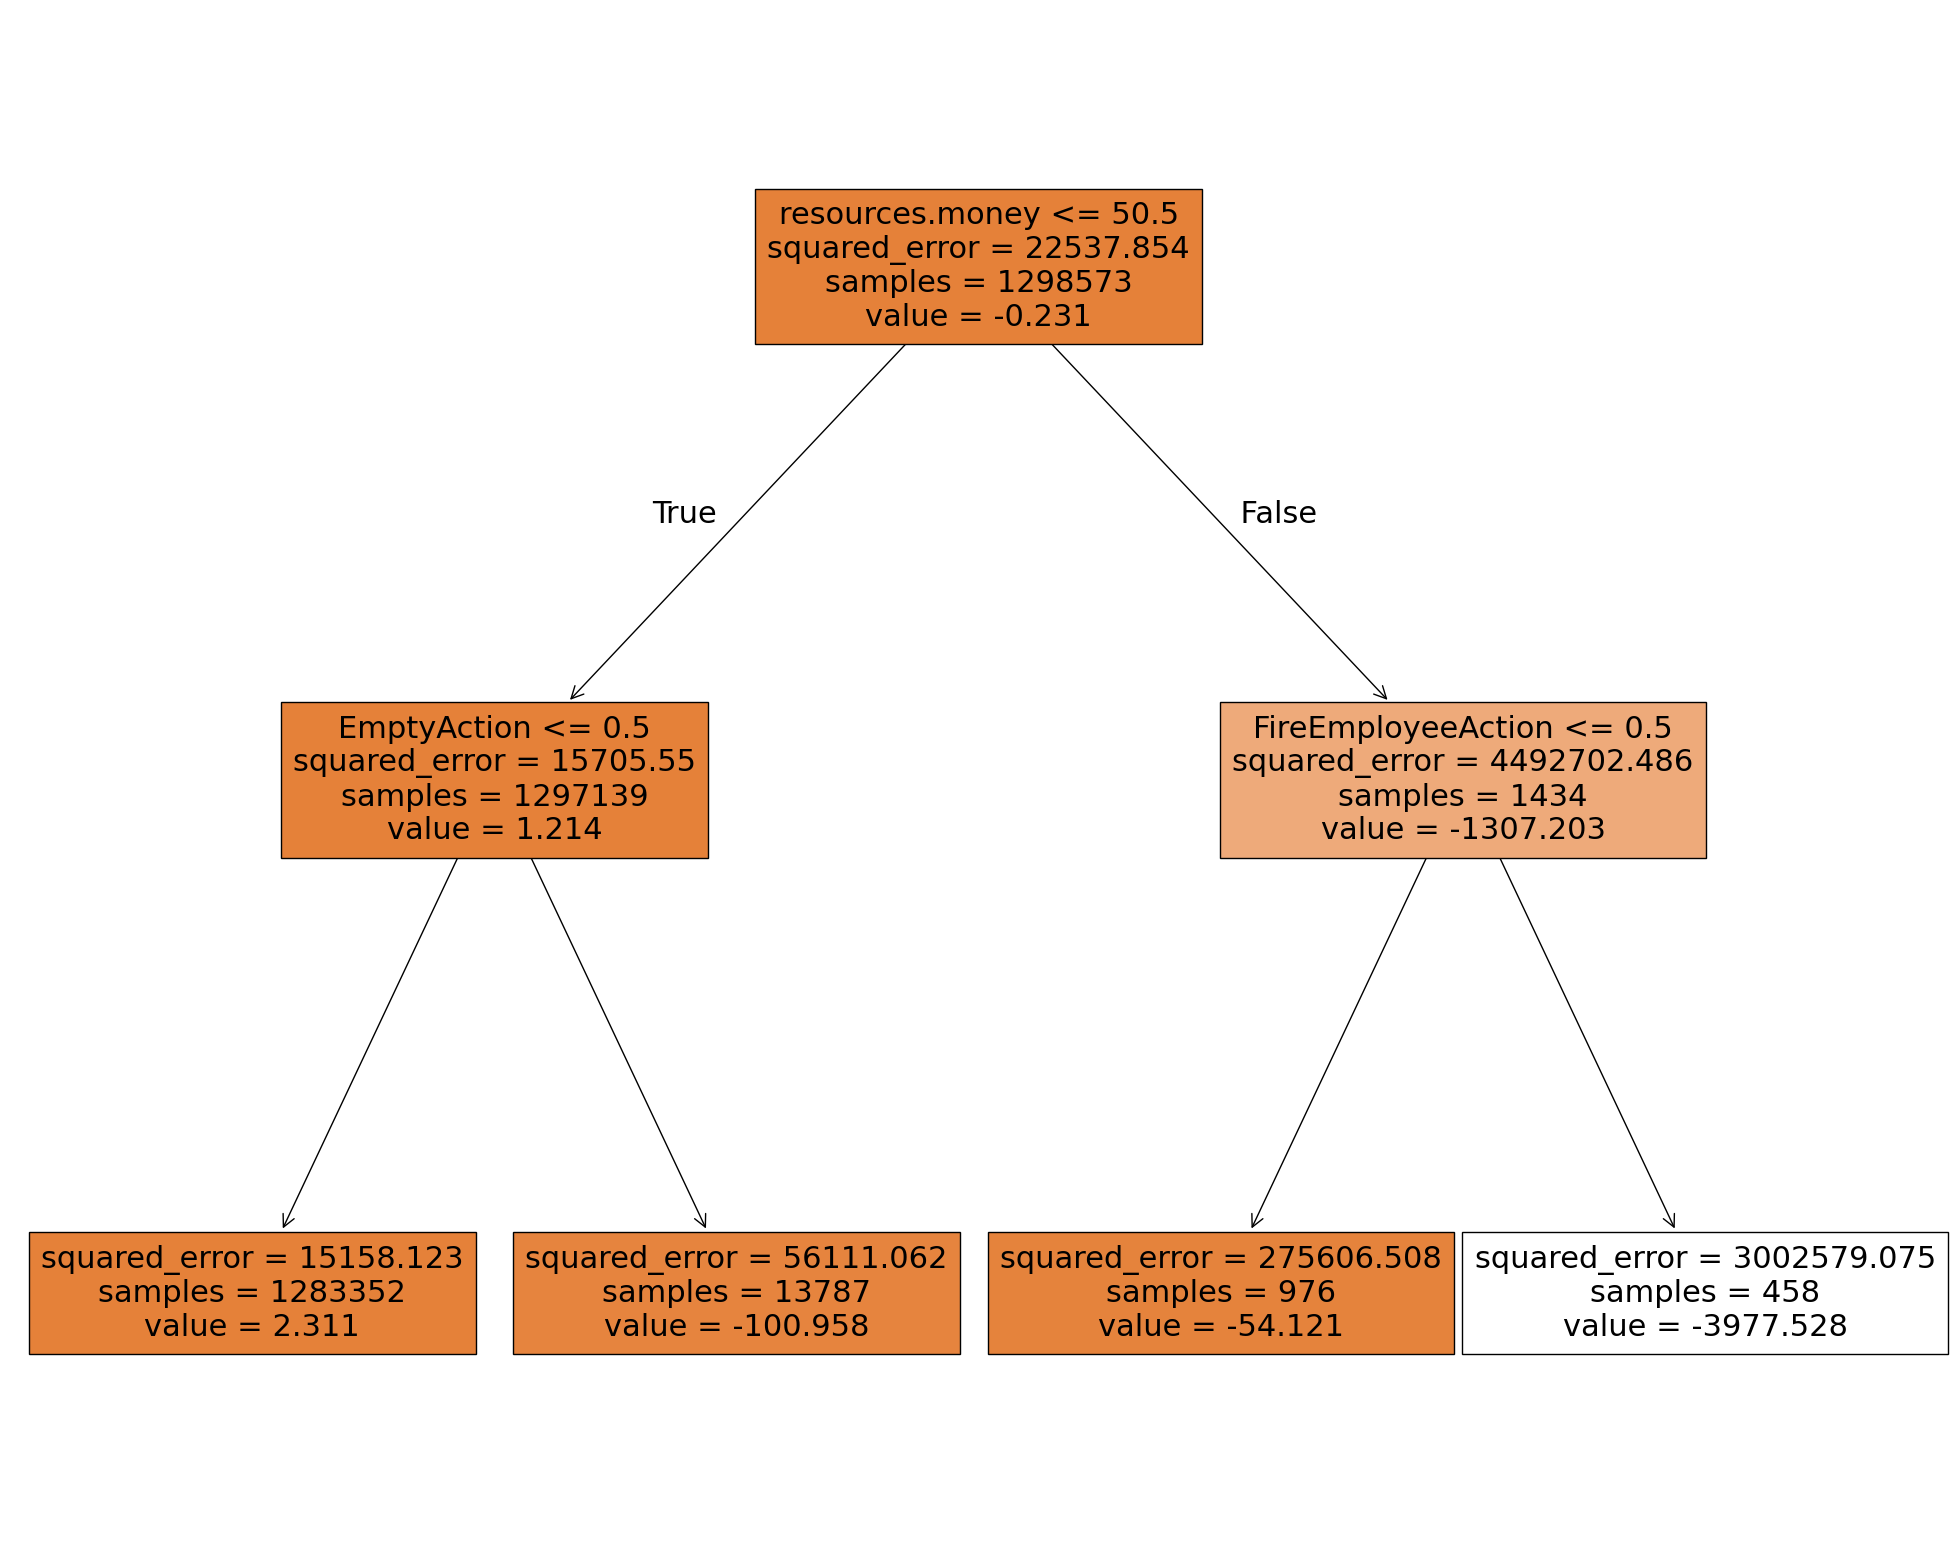

In [17]:

# getting all the columns
my_cols = set(df.columns)
 
# removing the desired column
my_cols.remove('target') 

my_cols.remove('state_value') 
my_cols = list(my_cols)

# Prepare the data data
X = df[my_cols]
dummy = pd.get_dummies(df['action_type'], dtype=bool)
X = pd.concat([X, dummy], axis=1).drop('action_type', axis=1)


Y = df[['target']]

#Y = df[['target']]
# Fit the classifier with default hyper-parameters
clf = DecisionTreeRegressor(random_state=1234, max_depth=2)
model = clf.fit(X, Y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X.columns,  
                   filled=True)

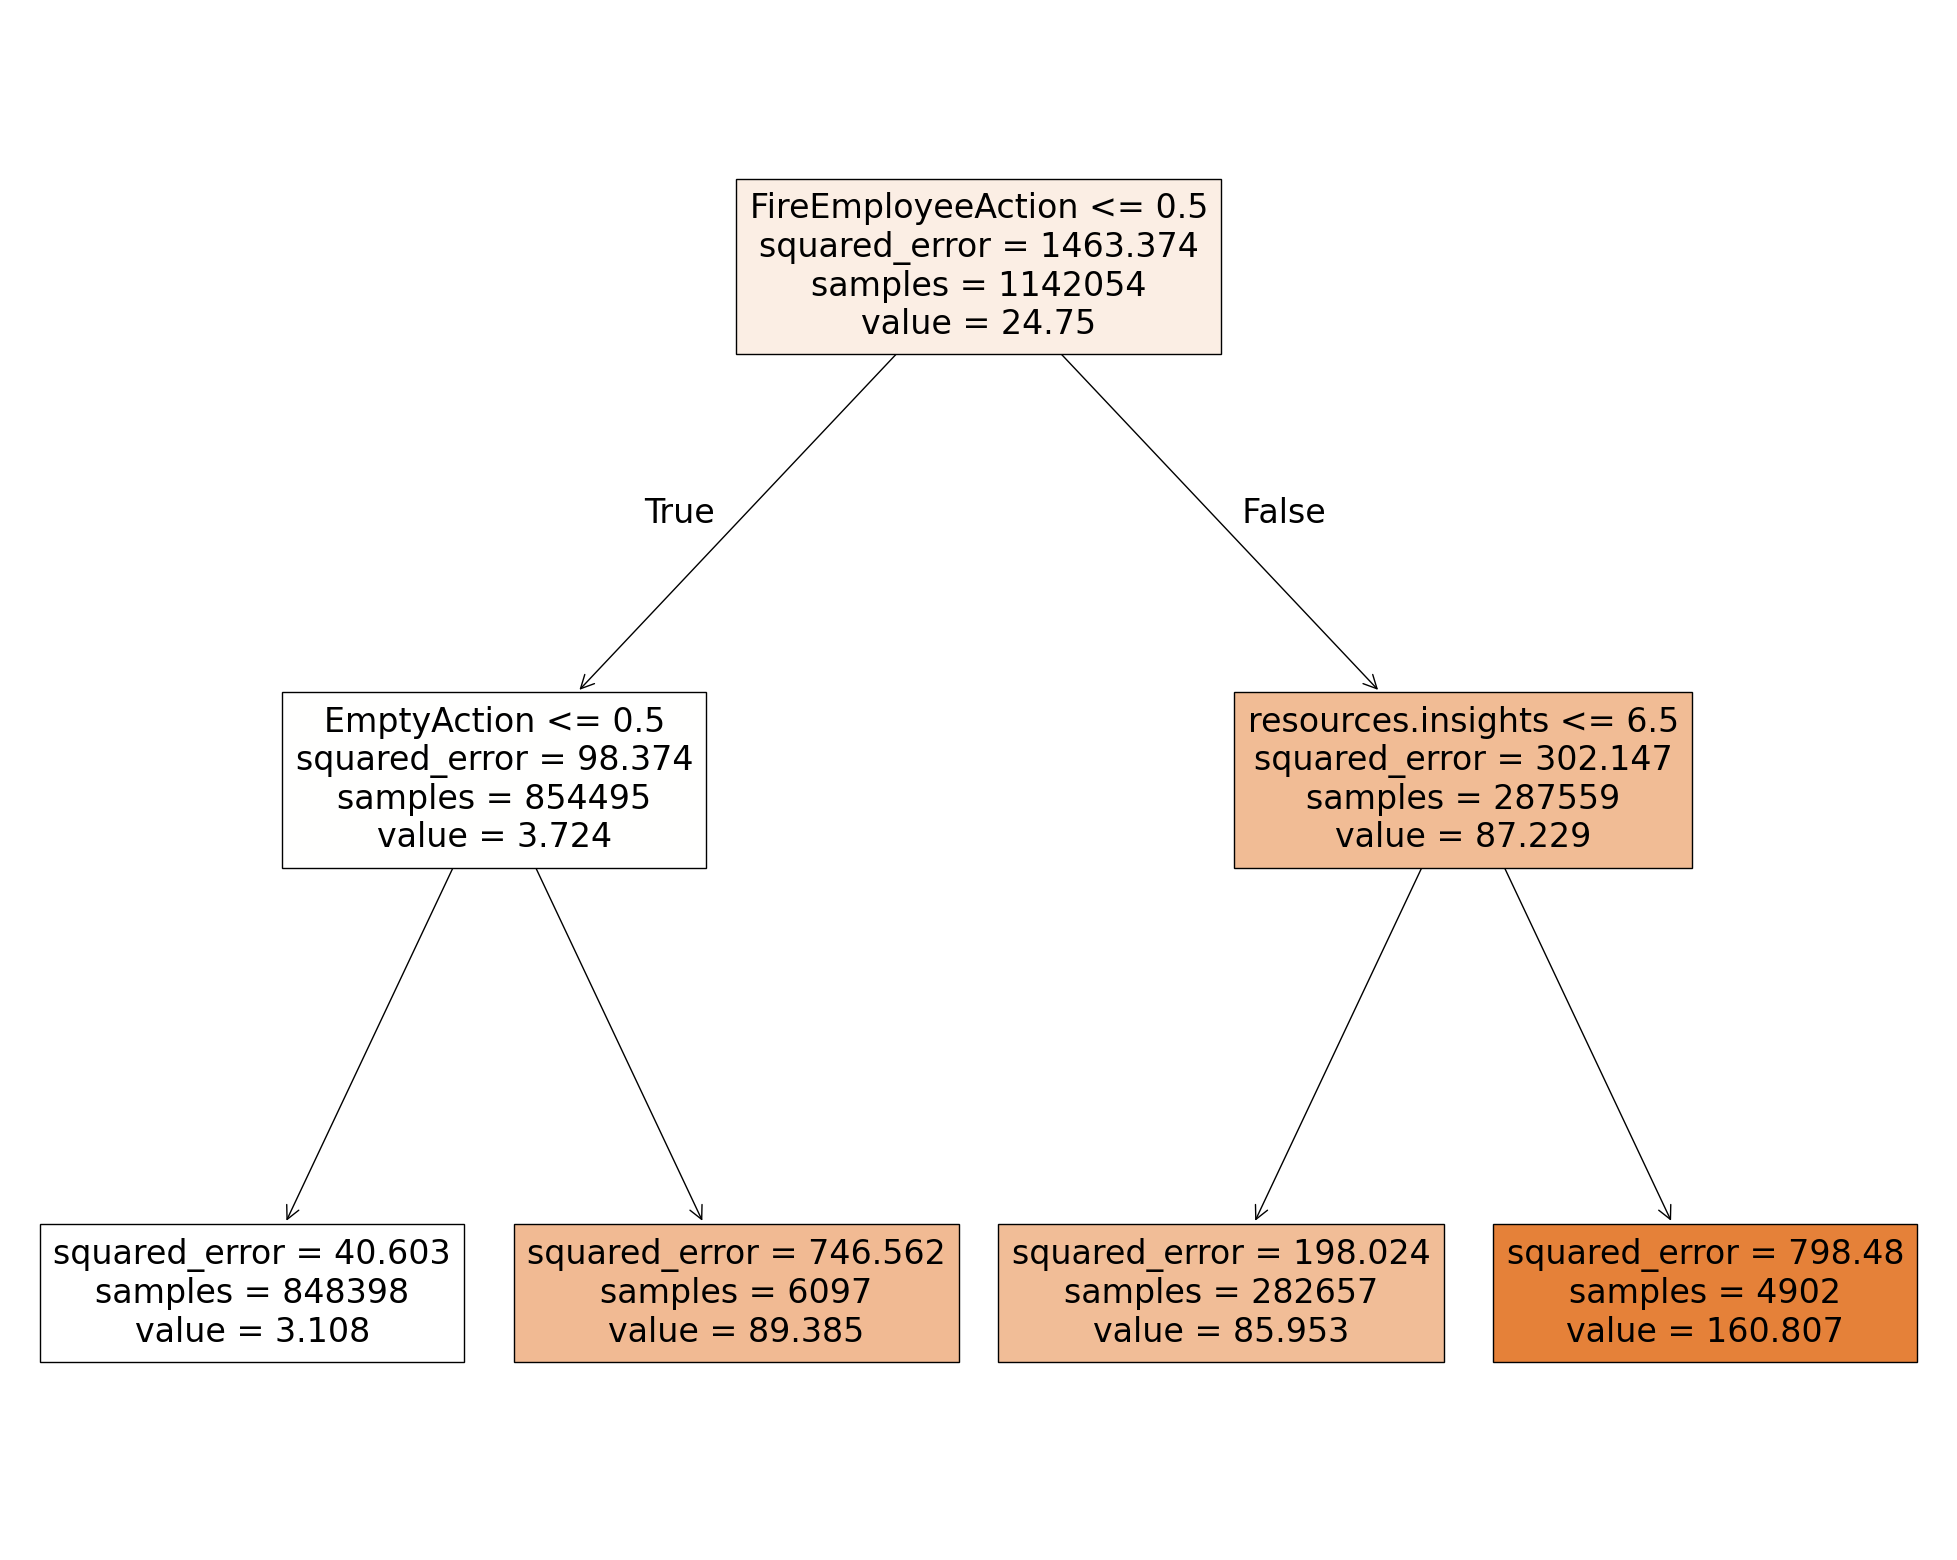

In [18]:

# getting all the columns
my_cols = set(df.columns)
 
# removing the desired column
my_cols.remove('target') 

my_cols.remove('state_value') 
my_cols = list(my_cols)

# Prepare the data data
X = df[my_cols]
dummy = pd.get_dummies(df['action_type'], dtype=bool)
X = pd.concat([X, dummy], axis=1).drop('action_type', axis=1)

X = X[df['target']>0]

Y = df[df['target']>0][['target']]

#Y = df[['target']]
# Fit the classifier with default hyper-parameters
clf = DecisionTreeRegressor(random_state=1234, max_depth=2)
model = clf.fit(X, Y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X.columns,  
                   filled=True)

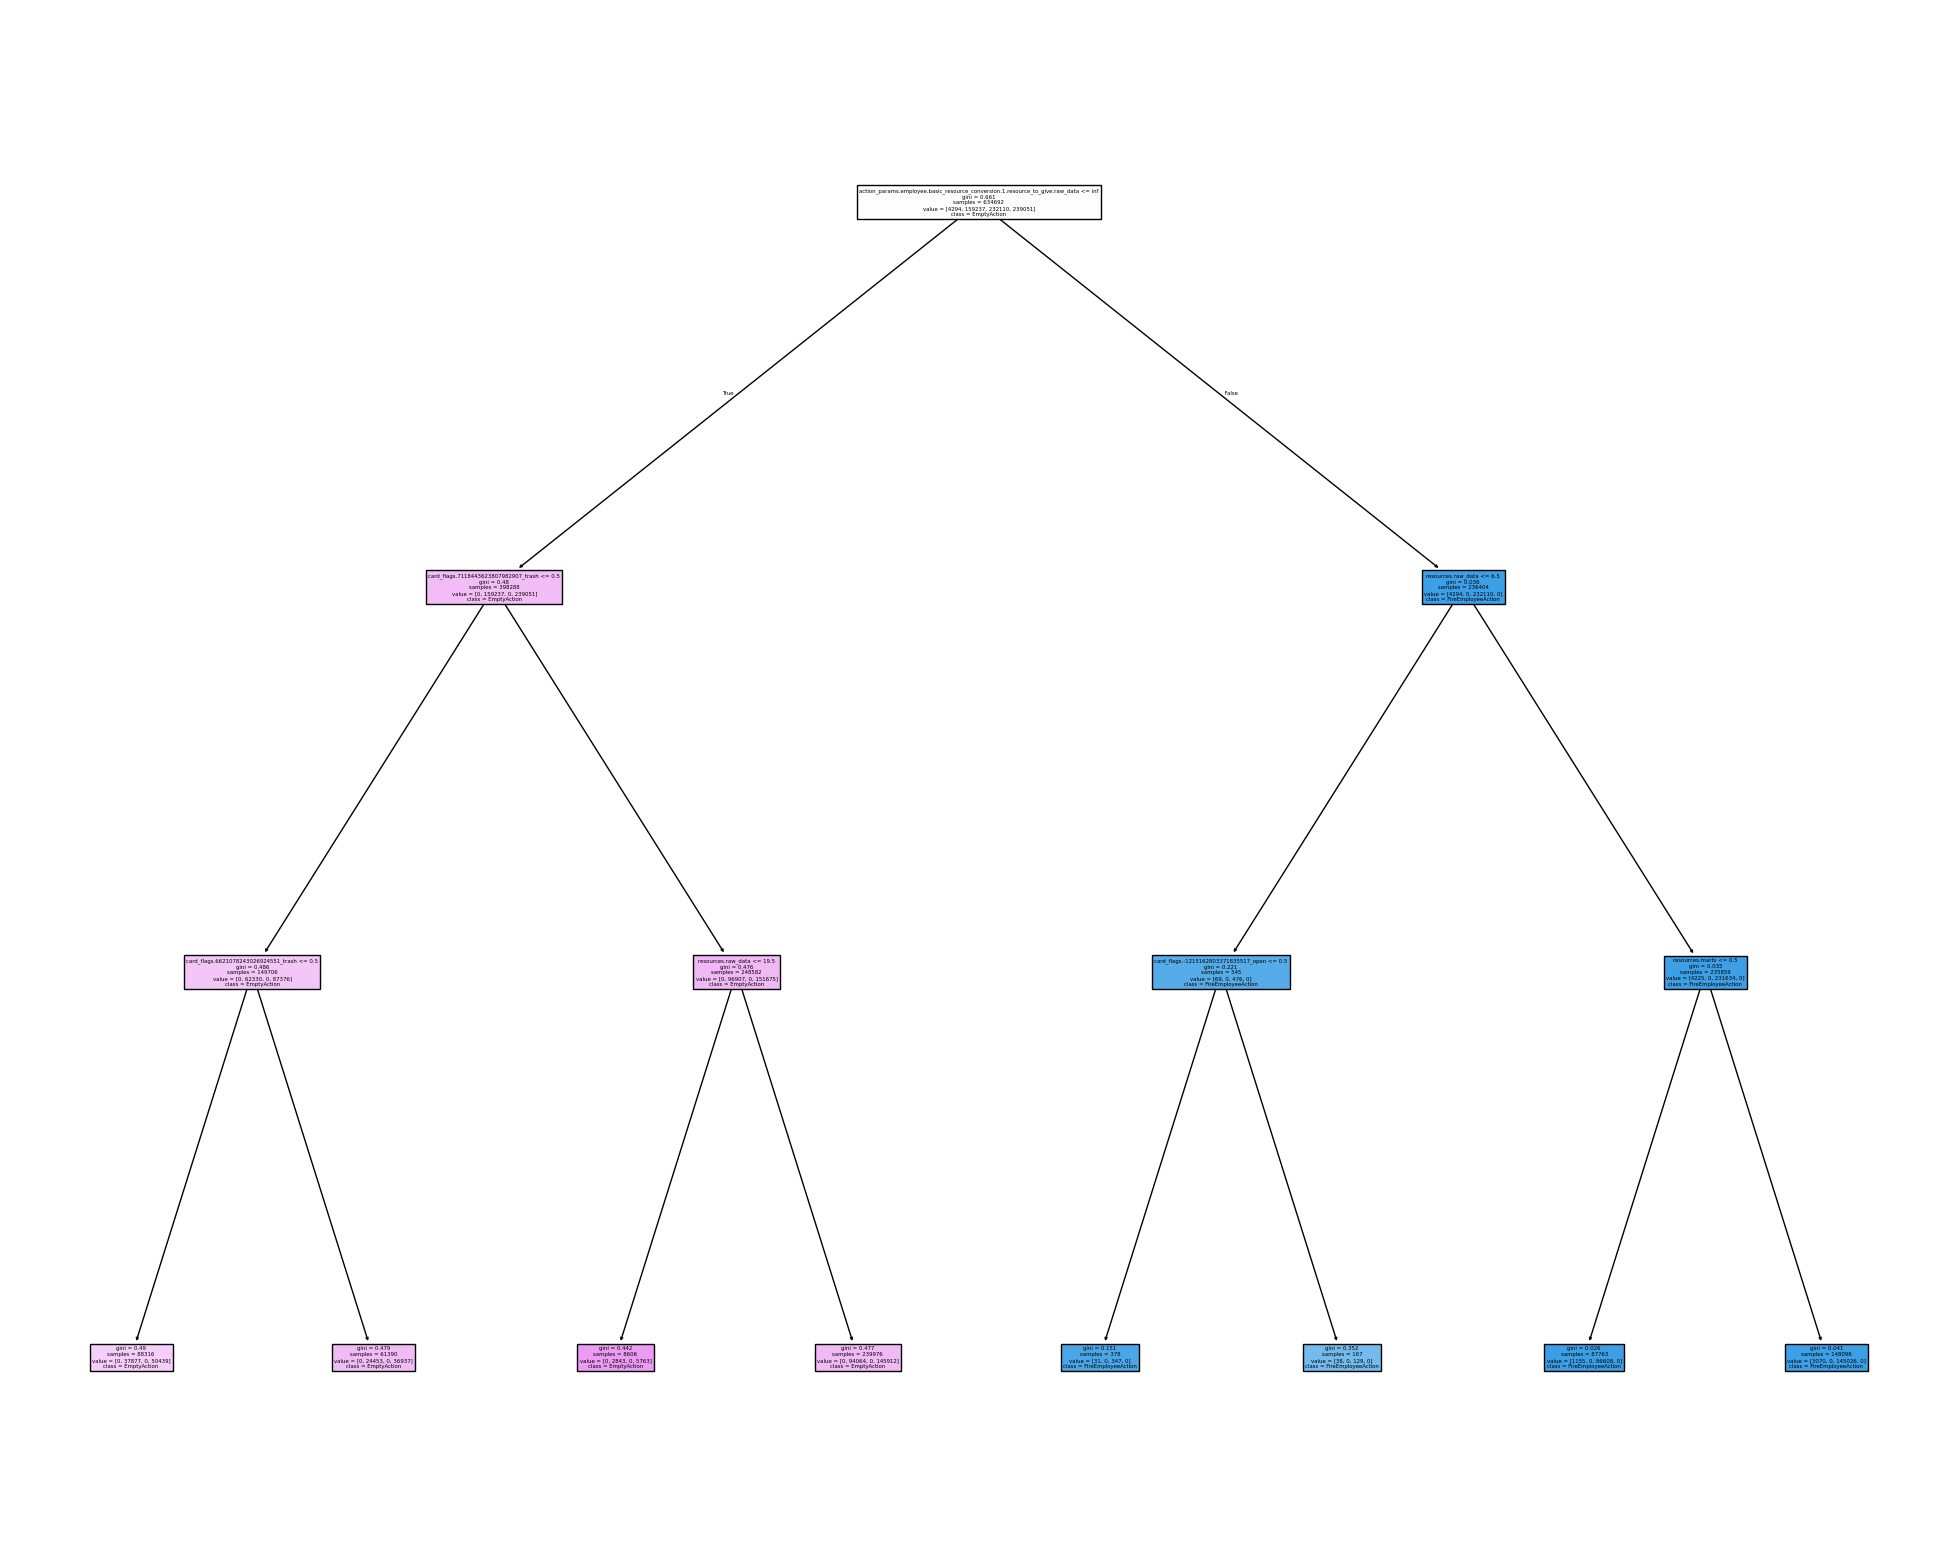

In [10]:

# getting all the columns
my_cols = set(df.columns)
 
# removing the desired column
my_cols.remove('target') 
my_cols.remove('state_value') 
my_cols.remove('action_type')
my_cols = list(my_cols)

# Prepare the data data
X = df[df['target']>0][my_cols]

Y = df[df['target']>0][['action_type']]
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=3)
model = clf.fit(X, Y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X.columns,  
                   class_names= Y['action_type'].unique(),
                   filled=True)

In [ ]:
dummy